# 3.1 Simulation of the Data

In [210]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from itertools import chain
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(6996)
# error term
epsilon_vec = np.random.normal(0,1,500).reshape(500,1)
# X_matrix or regressors or predictiors
X_mat = np.random.normal(0,2,size = (500,500))
# Slope
slope_vec = np.random.uniform(1,5,500)
# Simulate Ys
Y_mat = 1 + np.cumsum(X_mat * slope_vec,axis=1)[:,1:] + epsilon_vec
# each col of Y_mat representing one simulation vector: starting with 2 regressors, end with 500
print(Y_mat.shape)

(500, 499)


In [211]:
colname=[]
for i in range(1,501):
    colname.append('x_%d' % i)
colname.append('y')

# 3.2 Fitting Linear Models
## a. Fit linear model with the first 10 predictors. Store the result in the variable m10

In [212]:
colname10 = colname[:10],colname[500]
colname10 = list(chain(*colname10))
# colname10
data10 = pd.concat([pd.DataFrame(X_mat[:,0:10]),pd.DataFrame(Y_mat[:,8])], axis=1)
data10.columns=colname10
data10.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,-0.33475783,0.42881874,-3.1251072,-3.1847195,-1.6837742,-3.5886763,0.17178983,-2.414459,-0.74989064,3.0065965,-37.925192
1,-2.1953217,0.59844715,-0.84425164,1.7456083,-0.68533485,0.20236935,2.652052,3.0623478,-0.82163134,2.281375,33.965374
2,1.4445932,1.8229312,-0.19186176,-2.2519363,3.4082883,2.9307505,-1.3572725,0.59301773,1.0901583,-1.7501353,4.6118328
3,-1.6989436,2.5154728,1.5043008,-1.3058054,-3.0527556,-1.5208912,-0.71764847,1.1869579,3.1478943,1.1182741,5.6607219
4,-0.83870478,0.6557751,-1.2312254,-2.2012459,1.4507571,0.22814526,-0.86429294,-0.31200708,-0.49891045,1.0679062,-10.13787


In [213]:
# Split the sample into training and testing set, which will use them for the whole assignment
X_train, X_test, Y_train,Y_test = train_test_split(data10[colname[0:10]], data10.y, test_size=0.7, random_state=0)

In [268]:
# Create linear regression object
slopes=[]
intercepts=[]
in_dex=[]
linreg = LinearRegression(normalize=True)     
linreg.fit(X_train,Y_train)   
in_dex.append(X_train.columns)
#slopes.append(linreg.coef_)
#intercepts.append(linreg.intercept_)
ret = pd.DataFrame({'slopes':linreg.coef_,'intercepts':linreg.intercept_},index=in_dex)
data10['m10'] = linreg.predict(data10[colname[0:10]])  
Y_pred_in = linreg.predict(X_train)
Y_pred_out = linreg.predict(X_test)
mse10_in = mean_squared_error(Y_train, Y_pred_in)
mse10_out = mean_squared_error(Y_test, Y_pred_out)
mse10_all = mean_squared_error(data10.y, data10.m10)
print('3/10 Training Sample Performance (Mean Squared Error): %.4f' %mse10_in, 
      '\n7/10 Testing Set Performance (Mean Squared Error): %.4f' %mse10_out, 
      '\nAll Sample Performance (Mean Squared Error): %.4f' %mse10_all)
display(ret)

3/10 Training Sample Performance (Mean Squared Error): 0.8219 
7/10 Testing Set Performance (Mean Squared Error): 1.0430 
All Sample Performance (Mean Squared Error): 0.9767


,intercepts,slopes
x_1,1.0220657,1.3290499
x_2,1.0220657,1.6967495
x_3,1.0220657,4.3707535
x_4,1.0220657,4.0190712
x_5,1.0220657,2.2769376
x_6,1.0220657,3.3004286
x_7,1.0220657,3.3368382
x_8,1.0220657,4.563843
x_9,1.0220657,1.5340946
x_10,1.0220657,4.7584678


## b. Fit linear model with 490 predictors. Store the result in the variable v490 (saved for later)

In [215]:
# Large Dataset
colname490 = colname[:490],colname[500]
colname490 = list(chain(*colname490))
# colname10
data490 = pd.concat([pd.DataFrame(X_mat[:,0:490]),pd.DataFrame(Y_mat[:,488])], axis=1)
data490.columns=colname490
data490.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_482,x_483,x_484,x_485,x_486,x_487,x_488,x_489,x_490,y
0,-0.33475783,0.42881874,-3.1251072,-3.1847195,-1.6837742,-3.5886763,0.17178983,-2.414459,-0.74989064,3.0065965,...,-1.0759863,3.6296882,-0.025855155,2.4547516,-2.14707,3.808618,1.4650123,2.4749943,-0.81437649,-71.41295
1,-2.1953217,0.59844715,-0.84425164,1.7456083,-0.68533485,0.20236935,2.652052,3.0623478,-0.82163134,2.281375,...,0.18654583,-2.2665417,0.96837203,-1.0684178,1.1876543,0.29416091,-3.2839057,-2.1619308,-2.2918064,31.040121
2,1.4445932,1.8229312,-0.19186176,-2.2519363,3.4082883,2.9307505,-1.3572725,0.59301773,1.0901583,-1.7501353,...,-3.1498417,-0.84016832,1.5393781,-1.0578307,0.96023736,-2.1413575,-3.1429497,1.3908508,-2.4372779,-193.3482
3,-1.6989436,2.5154728,1.5043008,-1.3058054,-3.0527556,-1.5208912,-0.71764847,1.1869579,3.1478943,1.1182741,...,-0.14621913,0.19638481,-3.4758394,-0.99083792,-1.7755692,0.88307464,3.0743703,-1.9394664,-1.3241632,37.786419
4,-0.83870478,0.6557751,-1.2312254,-2.2012459,1.4507571,0.22814526,-0.86429294,-0.31200708,-0.49891045,1.0679062,...,-1.0197233,-2.1399256,-0.70625507,-1.1882675,0.4611933,-3.3877571,2.2386498,-0.17550402,-1.5552738,-34.633976


In [216]:
# Split the sample into training and testing set, which will use them for the whole assignment
X_train2, X_test2, Y_train2,Y_test2 = train_test_split(data490[colname[0:490]], data490.y, test_size=0.7, random_state=0)

In [217]:
# Create linear regression object
linreg = LinearRegression(normalize=True)     
linreg.fit(X_train2,Y_train2)     
data490['v490'] = linreg.predict(data490[colname[0:490]])  
Y_pred_in2 = linreg.predict(X_train2)
Y_pred_out2 = linreg.predict(X_test2)
mse490_in = mean_squared_error(Y_train2, Y_pred_in2)
mse490_out = mean_squared_error(Y_test2, Y_pred_out2)
mse490_all = mean_squared_error(data490.y, data490.v490)
print('3/10 Training Sample Performance (Mean Squared Error): %.4f' %mse490_in, 
      '\n7/10 Testing Set Performance (Mean Squared Error): %.4f' %mse490_out, 
      '\nAll Sample Performance (Mean Squared Error): %.4f' %mse490_all)


3/10 Training Sample Performance (Mean Squared Error): 0.0000 
7/10 Testing Set Performance (Mean Squared Error): 15675.4094 
All Sample Performance (Mean Squared Error): 10972.7866


In [269]:
# linear regression for data490
X = sm.add_constant(X_train2)
regr = sm.OLS(Y_train2, X, missing='drop')
results = regr.fit()
print(results.summary())

/usr/local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/usr/local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/usr/local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 13 Feb 2018   Prob (F-statistic):                nan
Time:                        23:32:34   Log-Likelihood:                 4087.8
No. Observations:                 150   AIC:                            -7876.
Df Residuals:                       0   BIC:                            -7424.
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0515        inf          0        n

# 3.3 Ridge Regression

In [272]:
# Do Ridge regression
# First, let's view the table of the changing through alpha changing
from sklearn.linear_model import Ridge, RidgeCV
\

In [273]:
pd.options.display.float_format = '{:,.8g}'.format 
coef_matrix_ridge

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10
alpha_1e-15,1.0430324,1.0220657,1.3290499,1.6967495,4.3707535,4.0190712,2.2769376,3.3004286,3.3368382,4.563843,1.5340946,4.7584678
alpha_1e-10,1.0430324,1.0220657,1.3290499,1.6967495,4.3707535,4.0190712,2.2769376,3.3004286,3.3368382,4.563843,1.5340946,4.7584678
alpha_1e-08,1.0430323,1.0220657,1.3290499,1.6967494,4.3707535,4.0190711,2.2769375,3.3004286,3.3368381,4.5638429,1.5340946,4.7584677
alpha_0.0001,1.0430022,1.0220162,1.3288789,1.6964484,4.3703238,4.0187838,2.2767614,3.3001906,3.3365128,4.563309,1.5338277,4.7579752
alpha_0.001,1.0431175,1.0215715,1.3273416,1.6937424,4.3664597,4.016199,2.2751773,3.2980501,3.3335877,4.5585082,1.531429,4.7535471
alpha_0.01,1.0817796,1.0172138,1.3121798,1.6670632,4.3282056,3.9905313,2.2594654,3.2767821,3.3046401,4.5110589,1.5077872,4.7097298
alpha_1,103.04353,0.89945295,0.60783834,0.51418531,2.223612,2.3386377,1.2965314,1.8972137,1.7280911,2.112968,0.49409229,2.359177
alpha_5,286.99605,0.95068419,0.20553076,0.090695345,0.75767956,0.8728046,0.47997022,0.69782631,0.60701512,0.67445466,0.10423109,0.79042925
alpha_10,343.93678,0.97688275,0.11358722,0.038730156,0.41588129,0.48925928,0.26867734,0.38971555,0.33634453,0.36454892,0.049077098,0.4322273
alpha_20,379.38002,0.99428818,0.060051331,0.0169896,0.2186753,0.26039068,0.14288759,0.20695812,0.1778937,0.18998384,0.023339361,0.22678514


In [227]:
# have a look at the value of coefficients in the above model
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1) 

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [230]:
# Now we apply a larger range of alphas and use cross validation build in ridge to select the best lambda
alphas = 10**np.linspace(10,-2,100)*0.5
ridge_ = RidgeCV(alphas = alphas, normalize=True)
ridge_.fit(X_train,Y_train)
ridge_.alpha_

0.0050000000000000001

In [229]:
ridge_2 = Ridge(alpha = ridge_.alpha_, normalize = True)
ridge_2.fit(X_train,Y_train)
print(mean_squared_error(Y_test,ridge_2.predict(X_test)))

1.0519708569


# 3.4 Lasso Regression
## a. First 10 Predictors

In [276]:
# Do Lasso regression
from sklearn.linear_model import Lasso, LassoCV
def lasso_regression(x, y, x_test, y_test, alpha):     
    #Fit the model     
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter = 1e5)     
    lassoreg.fit(x,y)     
    y_pred = lassoreg.predict(x_test)          
    
    #Return the result in pre-defined format     
    mse = mean_squared_error(y_test,y_pred)      
    ret = [mse]     
    ret.extend([lassoreg.intercept_])     
    ret.extend(lassoreg.coef_)     
    return ret 

#Set the different values of alpha to be tested 
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3,1e-2, 1, 5, 10]  
#Initialize the dataframe for storing coefficients. 
col = ['mse','intercept'] + ['coef_x_%d'%i for i in range(1,11)] 
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)] 
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col) 

for i in range(10):     
    coef_matrix_lasso.iloc[i,] = lasso_regression(X_train, Y_train, X_test, Y_test, alpha_lasso[i])

In [277]:
pd.options.display.float_format = '{:,.8g}'.format 
coef_matrix_lasso

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10
alpha_1e-15,1.0430324,1.0220657,1.3290499,1.6967495,4.3707535,4.0190712,2.2769376,3.3004286,3.3368382,4.563843,1.5340946,4.7584678
alpha_1e-10,1.0430324,1.0220657,1.3290499,1.6967495,4.3707535,4.0190712,2.2769376,3.3004286,3.3368382,4.563843,1.5340946,4.7584678
alpha_1e-08,1.0430324,1.0220657,1.3290498,1.6967493,4.3707535,4.0190711,2.2769375,3.3004286,3.3368381,4.5638429,1.5340946,4.7584677
alpha_1e-05,1.0430592,1.0220635,1.3290183,1.6966331,4.3707197,4.0190176,2.2768899,3.3003904,3.3367621,4.5637666,1.5340203,4.7583966
alpha_0.0001,1.0432753,1.0219138,1.3284555,1.6958748,4.3702091,4.0185686,2.276491,3.3000445,3.3361811,4.5630468,1.5333201,4.7577712
alpha_0.001,1.0466667,1.0204165,1.3228277,1.6882908,4.3651037,4.014079,2.2725015,3.296585,3.3303713,4.5558485,1.5263179,4.7515162
alpha_0.01,1.2036064,1.0054439,1.2665493,1.6124516,4.3140496,3.9691827,2.2326073,3.2619901,3.2722726,4.4838653,1.4562958,4.6889671
alpha_1,420.97536,1.0154901,0,0,0,0,0,0,0,0,0,0
alpha_5,420.97536,1.0154901,0,0,0,0,0,0,0,0,0,0
alpha_10,420.97536,1.0154901,0,0,0,0,0,0,0,0,0,0


In [278]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1) 

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      0
alpha_0.0001     0
alpha_0.001      0
alpha_0.01       0
alpha_1         10
alpha_5         10
alpha_10        10
dtype: int64

In [235]:
# Fit LassoCV model to find the best lambda (here alpha)
lasso_ = LassoCV(alphas=None, cv=20, max_iter=1e5, normalize=True)
lasso_.fit(X_train,Y_train)
lasso_.alpha_

0.00086378215697320571

In [237]:
lasso_2 = Lasso(max_iter=1e5,normalize=True)
lasso_2.set_params(alpha=lasso_.alpha_)
lasso_2.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso_2.predict(X_test))

1.0460097566038866

## b. Entire Data

In [238]:
# For entire 10 Predictors which I built above with the best lambda
pd.Series(lasso_2.coef_, index=X_train.columns)

x_1    1.3236795
x_2    1.6894387
x_3    4.3658765
x_4    4.0147585
x_5    2.2731053
x_6    3.2971086
x_7    3.3312506
x_8    4.5569379
x_9    1.5273777
x_10   4.7524629
dtype: float64

In [242]:
# For the entire data (500 predictors):
data = pd.concat([pd.DataFrame(X_mat[:,0:500]),pd.DataFrame(Y_mat[:,498])], axis=1)
data.columns=colname
# data.head()
lasso_3 = LassoCV(alphas=None, cv=20, max_iter=1e5, normalize=True)
lasso_3.fit(data[colname[0:500]],data.y)
lasso_3.alpha_

0.0010639804021799033

In [243]:
# Coefficients
pd.Series(lasso_3.coef_, index=data.columns[0:500])

x_1       2.7139556
x_2      0.67467638
x_3        5.127154
x_4       4.2280714
x_5       1.0981551
x_6       2.7783306
x_7       2.4741461
x_8       4.7875589
x_9       1.3417779
x_10      6.1158176
x_11      4.3528225
x_12       3.741337
x_13      3.4142941
x_14      3.2624798
x_15     0.99925239
x_16      4.1669353
x_17              0
x_18      2.4336913
x_19      2.5284222
x_20      2.3776547
x_21      3.4010093
x_22       1.573833
x_23      4.6223171
x_24      2.9184727
x_25      1.4126244
x_26      0.4585978
x_27              0
x_28      4.3376707
x_29     -1.1151839
x_30      2.4612668
            ...    
x_471    0.62490441
x_472     5.0972315
x_473     1.9906031
x_474       3.44872
x_475     2.3363969
x_476     1.9170597
x_477     1.9328539
x_478     1.0962533
x_479     1.4157604
x_480     4.0147664
x_481     3.6720754
x_482     5.0610805
x_483     1.5828856
x_484     3.0222504
x_485     3.7781989
x_486   -0.09864608
x_487     1.9454339
x_488     3.7872578
x_489      3.809502


# 3.5 Large number of significant predictors

In [279]:
# DATA: data490 which is built before in section 3.2 b, as well as train and test set (thay all end with 2)
# Still I want to build model through train set and predict it through test set
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3,1e-2, 1, 5, 10]  
#Initialize the dataframe for storing coefficients. 
col = ['mse','intercept'] + ['coef_x_%d'%i for i in range(1,491)] 
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)] 
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col) 

for i in range(10):     
    coef_matrix_lasso.iloc[i,] = lasso_regression(X_train2, Y_train2, X_test2, Y_test2, alpha_lasso[i])

pd.options.display.float_format = '{:,.8g}'.format 
coef_matrix_lasso

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,...,coef_x_481,coef_x_482,coef_x_483,coef_x_484,coef_x_485,coef_x_486,coef_x_487,coef_x_488,coef_x_489,coef_x_490
alpha_1e-15,"30,491.483",5.3243319,0.087124021,4.4070221,12.593418,1.9210736,-0.53531534,5.7779288,4.2992208,12.329187,...,-1.4264097,1.5631415,0.46727943,-0.21182573,0.059307403,-1.8110514,-0.19695911,0.043331482,-0.78841838,1.6588827
alpha_1e-10,"30,491.483",5.3243318,0.087124021,4.4070221,12.593418,1.9210736,-0.53531533,5.7779288,4.2992208,12.329187,...,-1.4264097,1.5631415,0.46727943,-0.21182573,0.0593074,-1.8110514,-0.19695911,0.043331484,-0.78841838,1.6588827
alpha_1e-08,"30,491.479",5.3243303,0.087124022,4.4070207,12.593418,1.9210725,-0.5353149,5.7779282,4.2992204,12.329187,...,-1.426409,1.563142,0.46727927,-0.21182548,0.059307101,-1.8110505,-0.19695895,0.043331659,-0.78841772,1.6588823
alpha_1e-05,"30,487.287",5.3227688,0.087125117,4.4056817,12.593219,1.9200333,-0.53488018,5.7773158,4.2987906,12.328885,...,-1.4256939,1.5636553,0.46711964,-0.21157016,0.059005425,-1.8100815,-0.1967913,0.043508294,-0.78775161,1.6584717
alpha_0.0001,"24,507.892",3.6290619,-0.00010913596,2.9836206,11.378739,-0.62256762,-0.13988043,5.1347556,4.326331,10.894,...,0,1.9115933,-0.42783674,0.030210378,-0,0,0.15393938,0.40502195,0.4034167,0.73478941
alpha_0.001,"19,622.907",2.7415421,-0,0,3.2888968,0,0,1.7426842,0.86915109,0,...,3.3643496,7.5130213,-3.2085584,8.2541605,-0.64834486,-0,0.11118873,5.9860808,0.086815635,0
alpha_0.01,"20,602.823",-3.7821679,-0,0,1.3968733,0,0,1.289862,0.58432058,0,...,2.7987322,9.313385,-4.7633653,11.338061,-1.7490576,0,0.22253289,8.0881731,0.072741477,0
alpha_1,"19,218.762",2.7560876,0,0,2.998491,0,0,0,0,0,...,0,3.6385088,-3.9677019,8.5423599,-0,0,0,1.0843212,0,0
alpha_5,"20,484.138",7.6723022,-0,0,0,0,-0,0,0,0,...,0,0,-0,0,-0,0,0,0,0,-0
alpha_10,"20,484.138",7.6723022,-0,0,0,0,-0,0,0,0,...,0,0,-0,0,-0,0,0,0,0,-0


In [280]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1) 

alpha_1e-15       0
alpha_1e-10       0
alpha_1e-08       0
alpha_1e-05       0
alpha_0.0001    109
alpha_0.001     302
alpha_0.01      336
alpha_1         435
alpha_5         490
alpha_10        490
dtype: int64

In [246]:
# Fit LassoCV model to find the best lambda (here alpha)
lasso_5 = LassoCV(alphas=None, cv=20, max_iter=1e5, normalize=True)
lasso_5.fit(X_train2,Y_train2)
lasso_5.alpha_

0.64163004493476627

In [247]:
lasso_6 = Lasso(max_iter=1e5,normalize=True)
lasso_6.set_params(alpha=lasso_5.alpha_)
lasso_6.fit(X_test2, Y_test2)
mean_squared_error(Y_test2, lasso_6.predict(X_test2))

11880.0318322445

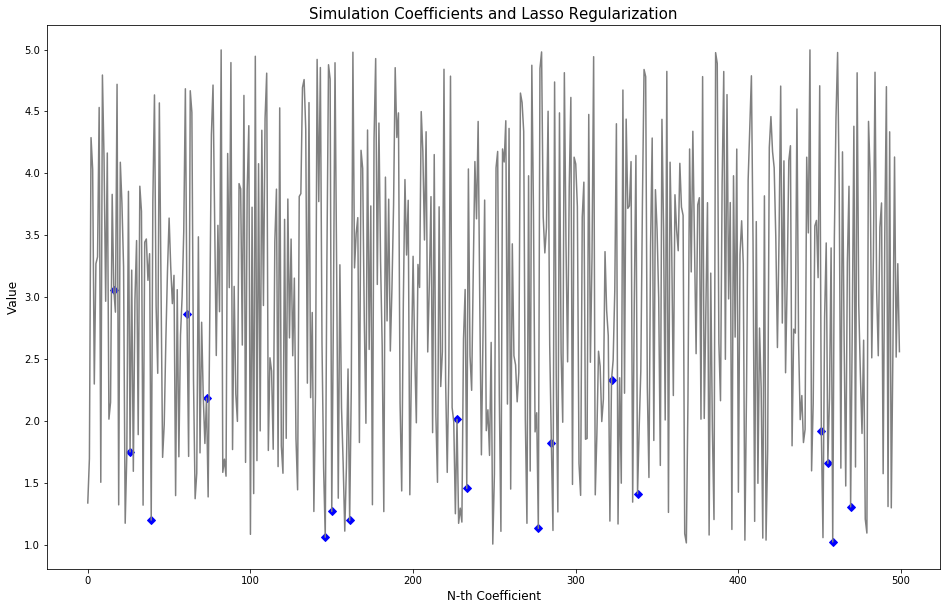

0.00106398040218


In [281]:
# fit lasso to the entire data
# Plot the plot of slopes from the simulation and the one removed from lasso regression model (whole dataset)
lassoreg = LassoCV(alphas=None, cv=20,normalize=True, max_iter = 1e5)
lassoreg.fit(data[colname[0:500]], data.y)
coef_ = lassoreg.coef_
x = np.array(np.where(coef_==0))
fig, ax = plt.subplots(figsize=(16, 10))
plt.plot(x, slope_vec[x],'D',color='blue')
plt.plot(slope_vec, color='grey')
ax.set_title("Simulation Coefficients and Lasso Regularization", fontsize=15)
ax.set_ylabel('Value', fontsize = 12)
ax.set_xlabel('N-th Coefficient', fontsize=12)
plt.show()
print(lassoreg.alpha_)